In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
diabetes_df = pd.read_csv("Dataset_Diabetes_Diabetic_Data.csv")
diabetes_df

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabatic
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,No,No
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,Ch,Yes
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,No,Yes
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,Ch,Yes
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70175,100677726,AfricanAmerican,Female,[80-90),1,3,7,7,60,0,17,0,1,1,491,707,250,9,No,No
70176,38726739,AfricanAmerican,Female,[70-80),1,1,7,3,57,4,11,0,0,1,786,414,424,9,No,No
70177,58160520,AfricanAmerican,Male,[90-100),1,3,7,4,21,1,8,0,0,1,820,427,276,9,No,No
70178,43686936,Caucasian,Female,[80-90),1,1,7,1,49,0,12,0,0,0,427,428,428,9,No,No


In [3]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70180 entries, 0 to 70179
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   patient_nbr               70180 non-null  int64 
 1   race                      70180 non-null  object
 2   gender                    70180 non-null  object
 3   age                       70180 non-null  object
 4   admission_type_id         70180 non-null  int64 
 5   discharge_disposition_id  70180 non-null  int64 
 6   admission_source_id       70180 non-null  int64 
 7   time_in_hospital          70180 non-null  int64 
 8   num_lab_procedures        70180 non-null  int64 
 9   num_procedures            70180 non-null  int64 
 10  num_medications           70180 non-null  int64 
 11  number_outpatient         70180 non-null  int64 
 12  number_emergency          70180 non-null  int64 
 13  number_inpatient          70180 non-null  int64 
 14  diag_1                

In [4]:
diabetes_df.isna().sum()

patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
change                      0
diabatic                    0
dtype: int64

In [5]:
# Are there any duplicates ?

duplicate_rows = diabetes_df[diabetes_df.duplicated()]
num_duplicates = diabetes_df.duplicated().sum()
print("Total number of duplicate rows: ", num_duplicates)
duplicate_rows

Total number of duplicate rows:  0


,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabatic


Number of unique values of diabatic feature in diabetes_df-  2

The unique values of diabatic feature in diabetes_df- ['No' 'Yes']

Count of the unique values of diabatic feature in diabetes_df-  diabatic
Yes    46777
No     23403
Name: count, dtype: int64

The distribution of diabatic feature in diabetes_df-  diabatic
Yes    0.666529
No     0.333471
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Count plot indicating number of patients suffering from diabetes')

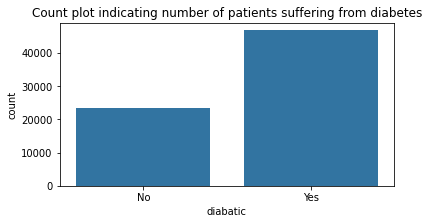

In [6]:
print('Number of unique values of diabatic feature in diabetes_df- ', diabetes_df['diabatic'].nunique())
print('\nThe unique values of diabatic feature in diabetes_df-', diabetes_df['diabatic'].unique())
print('\nCount of the unique values of diabatic feature in diabetes_df- ',  diabetes_df['diabatic'].value_counts())
print('\nThe distribution of diabatic feature in diabetes_df- ',  diabetes_df['diabatic'].value_counts(normalize = True))

plt.figure(figsize = (6, 3))
sns.countplot(x = 'diabatic', data = diabetes_df)
plt.title('Count plot indicating number of patients suffering from diabetes')

As per the given data, 67% of the patient mentioned in the dataset are Diabetic.

In [7]:
# Dropping the unwanted variable patient_nbr

diabetes_df.drop(["patient_nbr"], axis = 1, inplace = True)

In [8]:
for col in diabetes_df.columns:
  if diabetes_df[col].dtype == 'object':
    print(col)

race
gender
age
diag_1
diag_2
diag_3
change
diabatic


The number of unique values in admission_type_id are: 8
The unique values in admission_type_id are: [6 1 2 3 4 5 8 7]
Count of the unique values in admission_type_id are admission_type_id
4        8
7        8
8      202
5     4133
6     4584
3    12171
2    13443
1    35631
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of the type of admission')

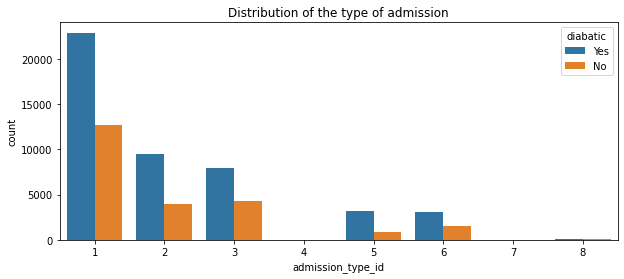

In [9]:
print('The number of unique values in admission_type_id are: {}'.format(diabetes_df['admission_type_id'].nunique()))
print('The unique values in admission_type_id are: {}'.format(diabetes_df['admission_type_id'].unique()))
print('Count of the unique values in admission_type_id are {}'.format(diabetes_df['admission_type_id'].value_counts().sort_values()))
plt.figure(figsize = (10, 4))
sns.countplot(x = 'admission_type_id', data = diabetes_df, hue = 'diabatic')
plt.title('Distribution of the type of admission')

The number of unique values in discharge_disposition_id are: 26
The unique values in discharge_disposition_id are: [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
Count of the unique values in discharge_disposition_id are discharge_disposition_id
20        2
12        3
27        3
19        5
10        6
9         8
16       11
17       14
24       18
15       53
28       80
8       106
14      221
13      221
23      304
7       419
4       682
25      979
5      1031
22     1196
11     1255
2      1529
18     3677
6      8199
3      8666
1     41492
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of the type of discharge disposition')

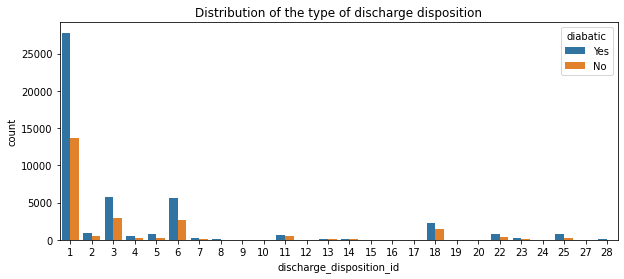

In [10]:
print('The number of unique values in discharge_disposition_id are: {}'.format(diabetes_df['discharge_disposition_id'].nunique()))
print('The unique values in discharge_disposition_id are: {}'.format(diabetes_df['discharge_disposition_id'].unique()))
print('Count of the unique values in discharge_disposition_id are {}'.format(diabetes_df['discharge_disposition_id'].value_counts().sort_values()))
plt.figure(figsize = (10, 4))
sns.countplot(x = 'discharge_disposition_id', data = diabetes_df, hue = 'diabatic')
plt.title('Distribution of the type of discharge disposition')

The number of unique values in admission_source_id are: 13
The unique values in admission_source_id are: [ 1  7  2  4  5  6 20  3 17  8  9 14 10]
Count of the unique values in admission_source_id are admission_source_id
14        2
10        2
8         8
9       119
20      160
3       177
5       706
2      1061
6      2122
4      2608
17     6298
1     20550
7     36367
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of the type of admission')

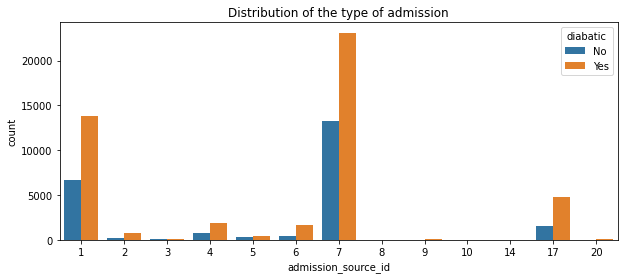

In [11]:
print('The number of unique values in admission_source_id are: {}'.format(diabetes_df['admission_source_id'].nunique()))
print('The unique values in admission_source_id are: {}'.format(diabetes_df['admission_source_id'].unique()))
print('Count of the unique values in admission_source_id are {}'.format(diabetes_df['admission_source_id'].value_counts().sort_values()))
plt.figure(figsize = (10, 4))
sns.countplot(x = 'admission_source_id', data = diabetes_df, hue = 'diabatic')
plt.title('Distribution of the type of admission')

The number of unique values in time_in_hospital are: 14
The unique values in time_in_hospital are: [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
Count of the unique values in time_in_hospital are time_in_hospital
14      752
13      870
12     1082
11     1374
10     1690
9      2104
8      3139
7      4060
6      5218
5      6794
4      9470
1      9968
3     11807
2     11852
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of the number of days spend in hospital')

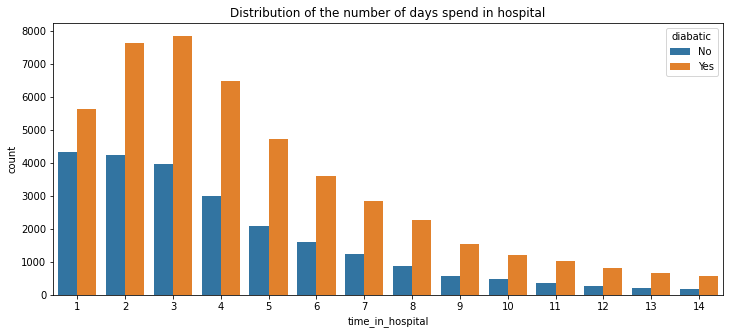

In [12]:
print('The number of unique values in time_in_hospital are: {}'.format(diabetes_df['time_in_hospital'].nunique()))
print('The unique values in time_in_hospital are: {}'.format(diabetes_df['time_in_hospital'].unique()))
print('Count of the unique values in time_in_hospital are {}'.format(diabetes_df['time_in_hospital'].value_counts().sort_values()))
plt.figure(figsize = (12, 5))
sns.countplot(x = 'time_in_hospital', data = diabetes_df, hue = 'diabatic')
plt.title('Distribution of the number of days spend in hospital')

The number of unique values in num_lab_procedures are: 116
The unique values in num_lab_procedures are: [ 41  59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29
  35  42  66  36  19  64  25  53  52  87  27  37  46  28  48  72  10   2
  65  67  40  54  58  57  43  32  83  34  39  69  38  56  22  96  78  61
  88  50   1  18  82   9  63  24  71  77  81  76  90  93   3 103  13  80
  85  16  15  12  30  23  17  21  79  26   5  95  97  84  14  74 105  86
  98  20   6  94   8 102 100   7  89  91  92   4 101  99 114 113 111 129
 107 108 106 104 109 120 126 118]
Count of the unique values in num_lab_procedures are num_lab_procedures
118       1
129       1
107       1
126       1
120       1
       ... 
38     1638
45     1685
1      1826
44     1854
43     2095
Name: count, Length: 116, dtype: int64


Text(0.5, 1.0, 'Distribution of the number of lab tests performed during the stay in the hospital')

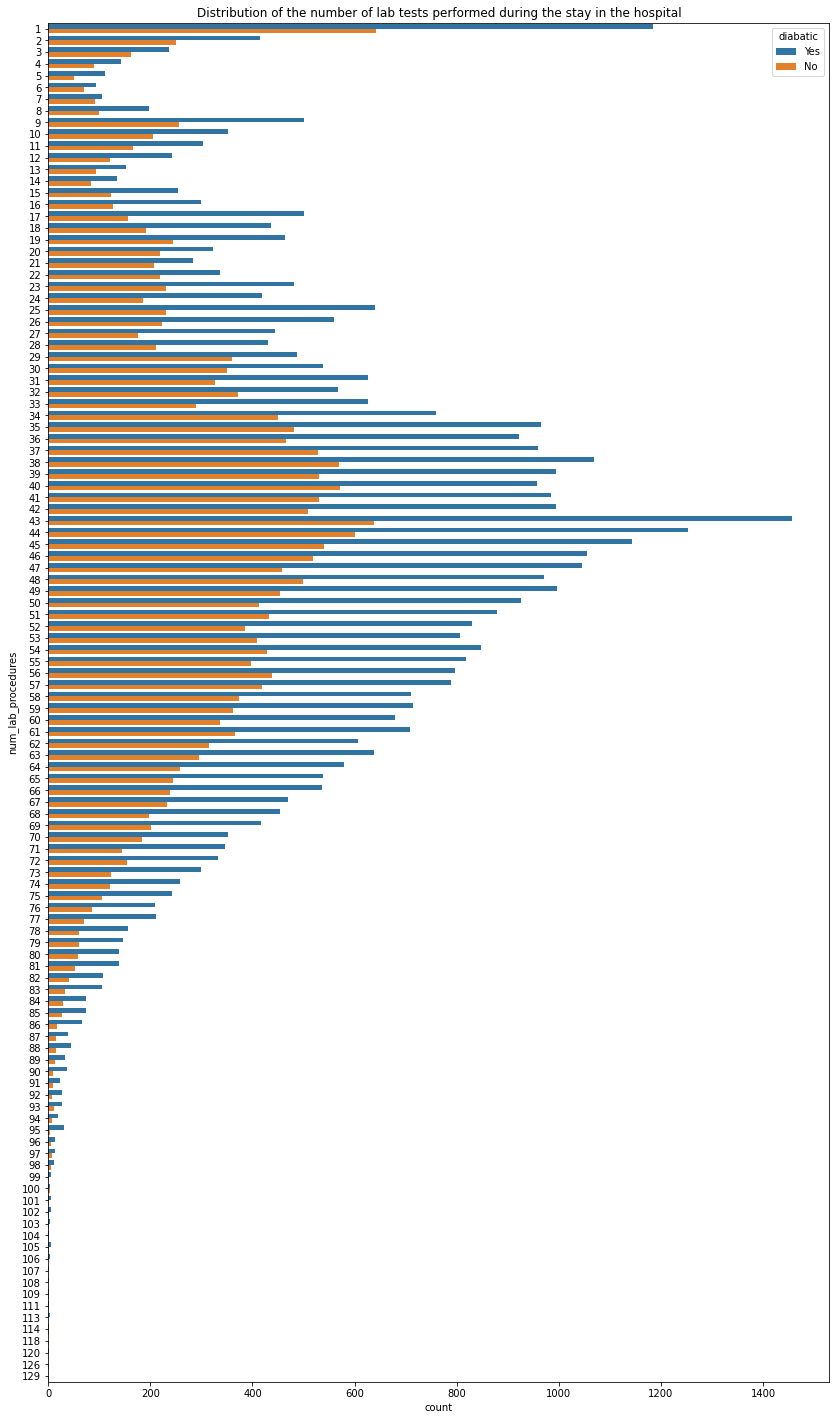

In [13]:
print('The number of unique values in num_lab_procedures are: {}'.format(diabetes_df['num_lab_procedures'].nunique()))
print('The unique values in num_lab_procedures are: {}'.format(diabetes_df['num_lab_procedures'].unique()))
print('Count of the unique values in num_lab_procedures are {}'.format(diabetes_df['num_lab_procedures'].value_counts().sort_values()))
plt.figure(figsize = (14, 25))
sns.countplot(y = 'num_lab_procedures', data = diabetes_df, hue = 'diabatic')
plt.title('Distribution of the number of lab tests performed during the stay in the hospital')

The number of unique values in num_procedures are: 7
The unique values in num_procedures are: [0 5 1 6 2 3 4]
Count of the unique values in num_procedures are num_procedures
5     2374
4     2894
6     3020
3     6906
2     8931
1    14600
0    31455
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of the number of procedures (other than lab tests) performed during the stay in the hospital')

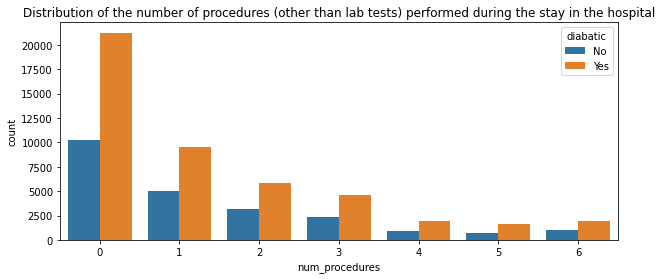

In [14]:
print('The number of unique values in num_procedures are: {}'.format(diabetes_df['num_procedures'].nunique()))
print('The unique values in num_procedures are: {}'.format(diabetes_df['num_procedures'].unique()))
print('Count of the unique values in num_procedures are {}'.format(diabetes_df['num_procedures'].value_counts().sort_values()))
plt.figure(figsize = (10, 4))
sns.countplot(x = 'num_procedures', data = diabetes_df, hue = 'diabatic')
plt.title('Distribution of the number of procedures (other than lab tests) performed during the stay in the hospital')

The number of unique values in num_medications are: 74
The unique values in num_medications are: [ 1 18 13 16  8 21 12 28 17 11 15 31  2 23 19  7 20 14 10 22  9 27 25  4
 32  6 30 26 24 33  5 39  3 29 61 40 46 41 36 34 35 50 43 42 37 51 38 45
 54 52 49 62 55 47 44 53 48 57 59 56 60 63 58 70 67 64 69 65 68 66 81 79
 75 72]
Count of the unique values in num_medications are num_medications
72       1
81       1
75       1
79       1
70       2
      ... 
14    3963
10    3963
11    4204
13    4265
12    4337
Name: count, Length: 74, dtype: int64


Text(0.5, 1.0, 'Distribution of the number of distinct generic names administered during the encounter')

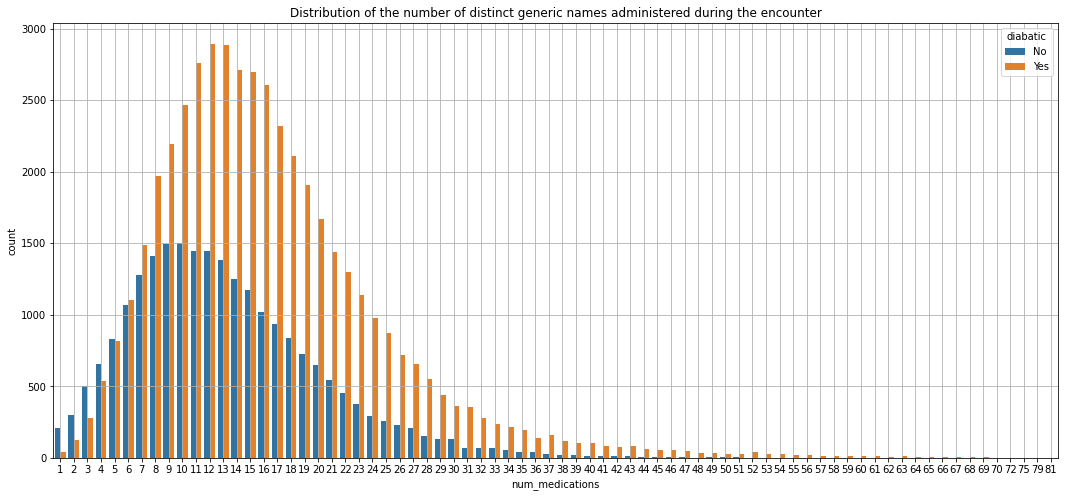

In [15]:
print('The number of unique values in num_medications are: {}'.format(diabetes_df['num_medications'].nunique()))
print('The unique values in num_medications are: {}'.format(diabetes_df['num_medications'].unique()))
print('Count of the unique values in num_medications are {}'.format(diabetes_df['num_medications'].value_counts().sort_values()))
plt.figure(figsize = (18, 8))
sns.countplot(x = 'num_medications', data = diabetes_df, hue = 'diabatic')
plt.grid()
plt.title('Distribution of the number of distinct generic names administered during the encounter')

The number of unique values in number_outpatient are: 29
The unique values in number_outpatient are: [ 0  2  1  5  7  9  3  8  4 12 11  6 20 15 10 13 14 16 21 35 17 29 36 18
 19 27 22 24 26]
Count of the unique values in number_outpatient are number_outpatient
26        1
35        1
27        1
19        1
36        1
24        1
29        2
17        2
22        2
18        2
20        3
21        3
16        9
13       11
15       11
12       13
14       13
11       19
10       27
9        37
8        57
7        82
6       153
5       294
4       592
3      1109
2      2038
1      5418
0     60277
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of the number of outpatient visits of the patient in the year preceding the encounter')

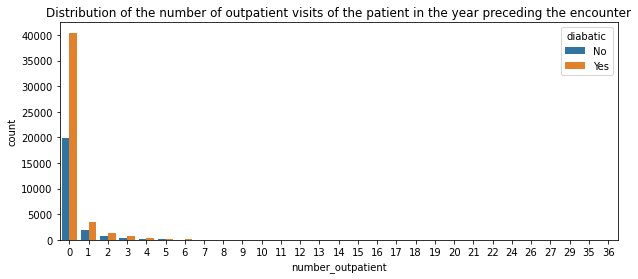

In [16]:
print('The number of unique values in number_outpatient are: {}'.format(diabetes_df['number_outpatient'].nunique()))
print('The unique values in number_outpatient are: {}'.format(diabetes_df['number_outpatient'].unique()))
print('Count of the unique values in number_outpatient are {}'.format(diabetes_df['number_outpatient'].value_counts().sort_values()))
plt.figure(figsize = (10, 4))
sns.countplot(x = 'number_outpatient', data = diabetes_df, hue = 'diabatic')
plt.title('Distribution of the number of outpatient visits of the patient in the year preceding the encounter')

The number of unique values in number_emergency are: 19
The unique values in number_emergency are: [ 0  1  2  4  3  9  5  7  6  8 22 25 10 13 42 16 11 28 64]
Count of the unique values in number_emergency are number_emergency
64        1
16        1
42        1
28        1
25        2
22        2
13        4
11        7
10       13
9        22
8        30
7        49
6        52
5        91
4       207
3       403
2      1163
1      4556
0     63575
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of the number of emergency visits of the patient in the year preceding the encounter')

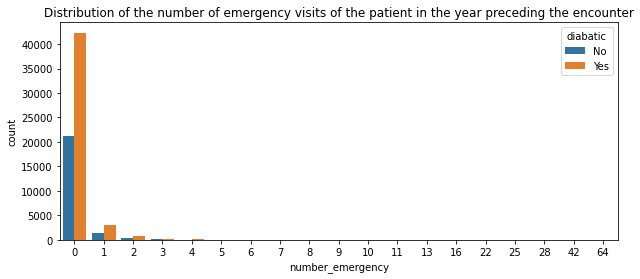

In [17]:
print('The number of unique values in number_emergency are: {}'.format(diabetes_df['number_emergency'].nunique()))
print('The unique values in number_emergency are: {}'.format(diabetes_df['number_emergency'].unique()))
print('Count of the unique values in number_emergency are {}'.format(diabetes_df['number_emergency'].value_counts().sort_values()))
plt.figure(figsize = (10, 4))
sns.countplot(x = 'number_emergency', data = diabetes_df, hue = 'diabatic')
plt.title('Distribution of the number of emergency visits of the patient in the year preceding the encounter')

The number of unique values in number_inpatient are: 21
The unique values in number_inpatient are: [ 0  1  2  3  6  5  4  7  8  9 15 10 11 14 12 13 17 16 21 18 19]
Count of the unique values in number_inpatient are number_inpatient
18        1
17        1
21        1
19        2
15        4
16        4
14        6
13       13
12       17
11       25
10       39
9        67
8       107
7       177
6       316
5       534
4      1046
3      2209
2      4967
1     13119
0     47525
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of the number of inpatient visits of the patient in the year preceding the encounter')

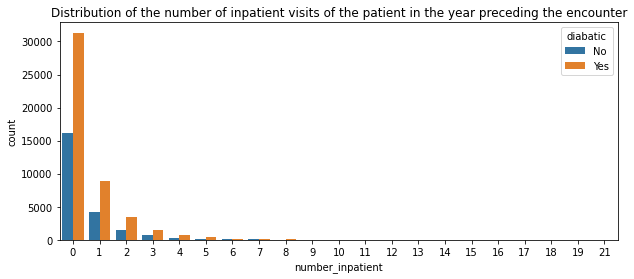

In [18]:
print('The number of unique values in number_inpatient are: {}'.format(diabetes_df['number_inpatient'].nunique()))
print('The unique values in number_inpatient are: {}'.format(diabetes_df['number_inpatient'].unique()))
print('Count of the unique values in number_inpatient are {}'.format(diabetes_df['number_inpatient'].value_counts().sort_values()))
plt.figure(figsize = (10, 4))
sns.countplot(x = 'number_inpatient', data = diabetes_df, hue = 'diabatic')
plt.title('Distribution of the number of inpatient visits of the patient in the year preceding the encounter')

The number of unique values in number_diagnoses are: 16
The unique values in number_diagnoses are: [ 1  9  6  7  5  8  3  4  2 12 15 16 13 10 11 14]
Count of the unique values in number_diagnoses are number_diagnoses
11        1
14        1
13        2
15        3
10        3
12        4
16       10
1       185
2       892
3      2373
4      4516
7      7668
8      7751
6      7806
5      9654
9     29311
Name: count, dtype: int64


Text(0.5, 1.0, 'Number of diagnoses entered to the system')

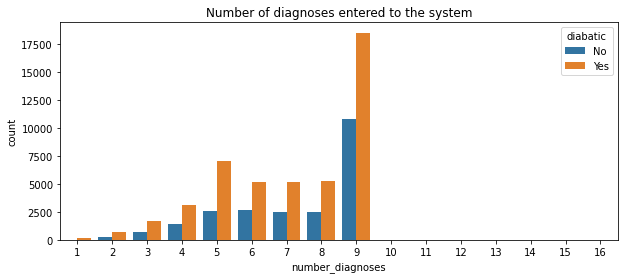

In [19]:
print('The number of unique values in number_diagnoses are: {}'.format(diabetes_df['number_diagnoses'].nunique()))
print('The unique values in number_diagnoses are: {}'.format(diabetes_df['number_diagnoses'].unique()))
print('Count of the unique values in number_diagnoses are {}'.format(diabetes_df['number_diagnoses'].value_counts().sort_values()))
plt.figure(figsize = (10, 4))
sns.countplot(x = 'number_diagnoses', data = diabetes_df, hue = 'diabatic')
plt.title('Number of diagnoses entered to the system')

The number of unique values in race are: 6
The unique values in race are: ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
Count of the unique values in race are race
Asian                373
Other                874
Hispanic            1341
?                   1461
AfricanAmerican    15008
Caucasian          51123
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of the race of the patient')

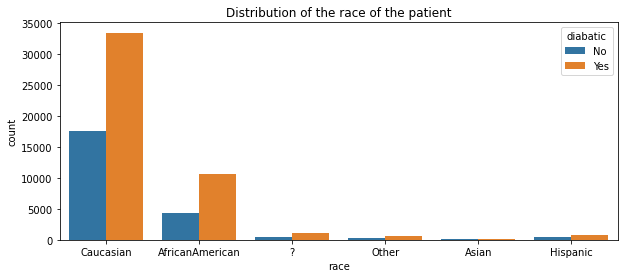

In [20]:
print('The number of unique values in race are: {}'.format(diabetes_df['race'].nunique()))
print('The unique values in race are: {}'.format(diabetes_df['race'].unique()))
print('Count of the unique values in race are {}'.format(diabetes_df['race'].value_counts().sort_values()))
plt.figure(figsize = (10, 4))
sns.countplot(x = 'race', data = diabetes_df, hue = 'diabatic')
plt.title('Distribution of the race of the patient')

The variable "race" has invalid character "?"


The number of unique values in gender are: 3
The unique values in gender are: ['Female' 'Male' 'Unknown/Invalid']
Count of the unique values in gender are gender
Unknown/Invalid        2
Male               32117
Female             38061
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of the gender of the patient')

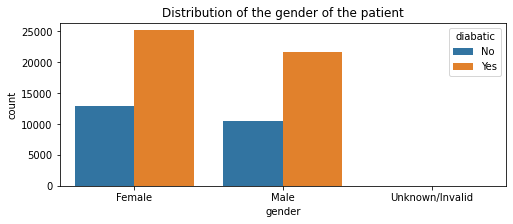

In [21]:
print('The number of unique values in gender are: {}'.format(diabetes_df['gender'].nunique()))
print('The unique values in gender are: {}'.format(diabetes_df['gender'].unique()))
print('Count of the unique values in gender are {}'.format(diabetes_df['gender'].value_counts().sort_values()))
plt.figure(figsize = (8, 3))
sns.countplot(x = 'gender', data = diabetes_df, hue = 'diabatic')
plt.title('Distribution of the gender of the patient')

The number of unique values in age are: 10
The unique values in age are: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
Count of the unique values in age are age
[0-10)        157
[10-20)       563
[20-30)      1178
[90-100)     1844
[30-40)      2779
[40-50)      6937
[80-90)     11261
[50-60)     12131
[60-70)     15231
[70-80)     18099
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of the age of the patient')

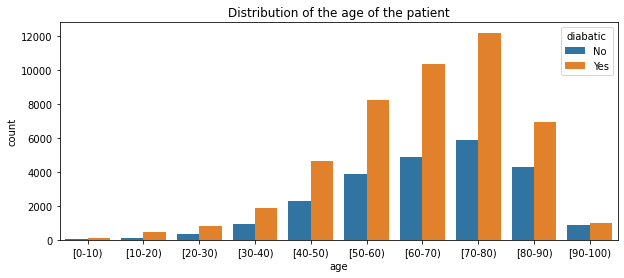

In [22]:
print('The number of unique values in age are: {}'.format(diabetes_df['age'].nunique()))
print('The unique values in age are: {}'.format(diabetes_df['age'].unique()))
print('Count of the unique values in age are {}'.format(diabetes_df['age'].value_counts().sort_values()))
plt.figure(figsize = (10, 4))
sns.countplot(x = 'age', data = diabetes_df, stat = 'count', hue = 'diabatic')
plt.title('Distribution of the age of the patient')

In [23]:
print('The number of unique values in diag_1 are: {}'.format(diabetes_df['diag_1'].nunique()))
print('The unique values in diag_1 are: {}'.format(diabetes_df['diag_1'].unique()))
print('Count of the unique values in diag_1 are {}'.format(diabetes_df['diag_1'].value_counts().sort_values()))

The number of unique values in diag_1 are: 685
The unique values in diag_1 are: ['250.83' '276' '648' '8' '197' '414' '428' '398' '434' '250.7' '157'
 '518' '999' '410' '682' '402' '737' '572' 'V57' '189' '786' '427' '996'
 '277' '584' '462' '473' '411' '174' '486' '998' '511' '432' '626' '295'
 '196' '250.6' '618' '182' '845' '423' '808' '250.4' '722' '403' '250.11'
 '784' '707' '440' '151' '715' '997' '198' '564' '812' '38' '590' '556'
 '578' '250.32' '433' 'V58' '569' '185' '536' '255' '250.13' '599' '558'
 '574' '491' '560' '244' '250.03' '577' '730' '188' '824' '250.8' '332'
 '562' '291' '296' '510' '401' '263' '438' '70' '250.02' '493' '642' '625'
 '571' '738' '593' '250.42' '807' '456' '446' '575' '250.41' '820' '515'
 '780' '250.22' '995' '235' '250.82' '721' '787' '162' '724' '282' '514'
 'V55' '281' '250.33' '530' '466' '435' '250.12' 'V53' '789' '566' '822'
 '191' '557' '733' '455' '711' '482' '202' '280' '553' '225' '154' '441'
 '250.81' '349' '?' '962' '592' '507' '386' '1

In [24]:
print('The number of unique values in diag_2 are: {}'.format(diabetes_df['diag_2'].nunique()))
print('The unique values in diag_2 are: {}'.format(diabetes_df['diag_2'].unique()))
print('Count of the unique values in diag_2 are {}'.format(diabetes_df['diag_2'].value_counts().sort_values()))

The number of unique values in diag_2 are: 702
The unique values in diag_2 are: ['?' '250.01' '250' '250.43' '157' '411' '492' '427' '198' '403' '288'
 '998' '507' '174' '425' '456' '401' '715' '496' '428' '585' '250.02'
 '410' '999' '996' '135' '244' '41' '571' '276' '997' '599' '424' '491'
 '553' '707' '286' '440' '493' '242' '70' 'V45' '250.03' '357' '511' '196'
 '396' '197' '414' '250.52' '577' '535' '413' '285' '53' '780' '518' '150'
 '566' '250.6' '867' '486' 'V15' '8' '788' '340' '574' '581' '228' '530'
 '250.82' '786' '294' '567' '785' '512' '305' '729' '250.51' '280' '648'
 '560' '618' '444' '38' 'V10' '578' '277' '781' '250.42' '278' '426' '584'
 '462' '402' '153' '272' '733' '34' '881' '203' '250.41' '250.13' '293'
 '245' '250.12' '558' '787' '342' '573' '626' '303' '250.53' '458' '710'
 '415' 'V42' '284' '569' '759' '682' '112' '292' '435' '290' '250.93'
 '642' '536' '398' '319' '711' 'E878' '446' '255' 'V44' '250.7' '784'
 '300' '562' '162' '287' '447' '789' '790' '591' '2

In [25]:
print('The number of unique values in diag_3 are: {}'.format(diabetes_df['diag_3'].nunique()))
print('The unique values in diag_3 are: {}'.format(diabetes_df['diag_3'].unique()))
print('Count of the unique values in diag_3 are {}'.format(diabetes_df['diag_3'].value_counts().sort_values()))

The number of unique values in diag_3 are: 727
The unique values in diag_3 are: ['?' '255' 'V27' '403' '250' 'V45' '38' '486' '996' '197' '250.6' '427'
 '627' '414' '416' '714' '428' '582' 'V43' '250.01' '263' '250.42' '276'
 '482' '401' '250.41' '585' '781' '278' '998' '568' '682' '618' '250.02'
 '305' '707' '496' '599' '715' '424' '518' '553' '794' '411' 'V42' '531'
 '511' '490' '562' '250.8' '250.7' '250.52' '784' '491' '581' '420' '8'
 '724' '730' '789' '131' '250.82' '999' '41' '493' '250.03' '753' '786'
 '529' 'E888' '425' '595' '303' '560' '711' '492' '332' '296' '438' '362'
 '250.4' '654' '244' 'V70' '737' '625' '681' '250.51' '404' 'V10' '810'
 '280' '440' '785' '588' '569' '272' '997' '250.43' '918' '584' '54' '788'
 '426' '722' '250.92' '196' '461' '535' '787' '891' '284' '458' '648'
 '780' '182' '285' '593' '413' '664' '564' '201' '356' 'V15' '292' '782'
 '473' '455' 'E932' '357' '348' '294' '250.23' '459' 'E878' '437' '733'
 '507' '525' '250.53' '397' '572' '805' '453' '33

The number of unique values in change are: 2
The unique values in change are: ['No' 'Ch']
Count of the unique values in change are change
Ch    26306
No    43874
Name: count, dtype: int64


Text(0.5, 1.0, 'Count plot indicating if there was a change in diabetic medications (either dosage or generic name)')

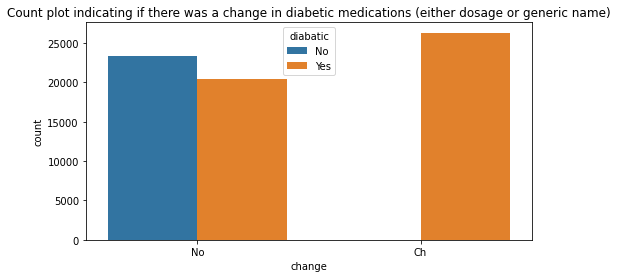

In [26]:
print('The number of unique values in change are: {}'.format(diabetes_df['change'].nunique()))
print('The unique values in change are: {}'.format(diabetes_df['change'].unique()))
print('Count of the unique values in change are {}'.format(diabetes_df['change'].value_counts().sort_values()))
plt.figure(figsize = (8, 4))
sns.countplot(x = 'change', data = diabetes_df, hue = 'diabatic')
plt.title('Count plot indicating if there was a change in diabetic medications (either dosage or generic name)')

diag1, diag2 and diag3 has invalid character "?".
diag1, diag2, diag3 — are categorical and have a lot of values.
We will remove the above categorial variables and use number_diagnoses to capture some of this information.


In [27]:
diabetes_df.drop(["diag_1","diag_2","diag_3"], axis=1, inplace = True)
print('After removing the columns the reduced size of diabetes_df is: ', diabetes_df.shape)

After removing the columns the reduced size of diabetes_df is:  (70180, 16)


The variable "race" has invalid character "?". Replacing "?" with "Nan" and remove all missing values.

In [28]:
diabetes_df['race'] = diabetes_df['race'].replace(to_replace = '?', value =np.nan)
diabetes_df.dropna(inplace=True)

print('After removing the data points having ? in the race variable, the reduced shape of the diabetes_df is:', diabetes_df.shape)

After removing the data points having ? in the race variable, the reduced shape of the diabetes_df is: (68719, 16)


In [29]:
# Are there any duplicates ?

dups = diabetes_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
diabetes_df[dups]

Number of duplicate rows = 22


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabatic
4722,AfricanAmerican,Female,[10-20),1,1,7,3,51,0,3,0,0,0,1,No,Yes
17298,Caucasian,Female,[20-30),3,1,1,3,22,1,15,0,0,0,7,No,No
18111,Caucasian,Male,[70-80),1,18,7,2,40,0,9,0,0,0,6,Ch,Yes
23475,Caucasian,Male,[0-10),1,1,7,3,47,0,5,0,0,0,1,No,Yes
23932,AfricanAmerican,Female,[50-60),1,1,7,2,34,0,8,0,0,0,4,No,Yes
34892,AfricanAmerican,Female,[50-60),1,1,7,1,46,0,10,0,0,0,6,No,Yes
41130,Caucasian,Female,[50-60),1,1,7,1,41,0,8,0,0,0,5,Ch,Yes
44590,Caucasian,Male,[70-80),1,1,7,1,32,0,4,0,0,0,3,No,Yes
54543,Caucasian,Male,[80-90),1,1,7,2,57,0,11,0,0,0,9,Ch,Yes
56744,AfricanAmerican,Male,[70-80),1,1,7,4,45,0,15,0,0,0,9,Ch,Yes


In [30]:
diabetes_df.drop_duplicates(keep = 'first', inplace = True)

print('After removing the duplicate data points from diabetes_df the reduced shape of diabetes_df is:', diabetes_df.shape)

After removing the duplicate data points from diabetes_df the reduced shape of diabetes_df is: (68697, 16)


In [31]:
diabetes_df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,68697.000000,68697.000000,68697.000000,68697.000000,68697.000000,68697.000000,68697.000000,68697.000000
mean,4.444343,42.666696,1.350248,15.366304,0.298208,0.159366,0.612923,7.178523
std,3.035171,19.215760,1.682883,8.076313,1.060660,0.729573,1.237399,1.985861
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,56.000000,2.000000,19.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,129.000000,6.000000,81.000000,36.000000,64.000000,21.000000,16.000000


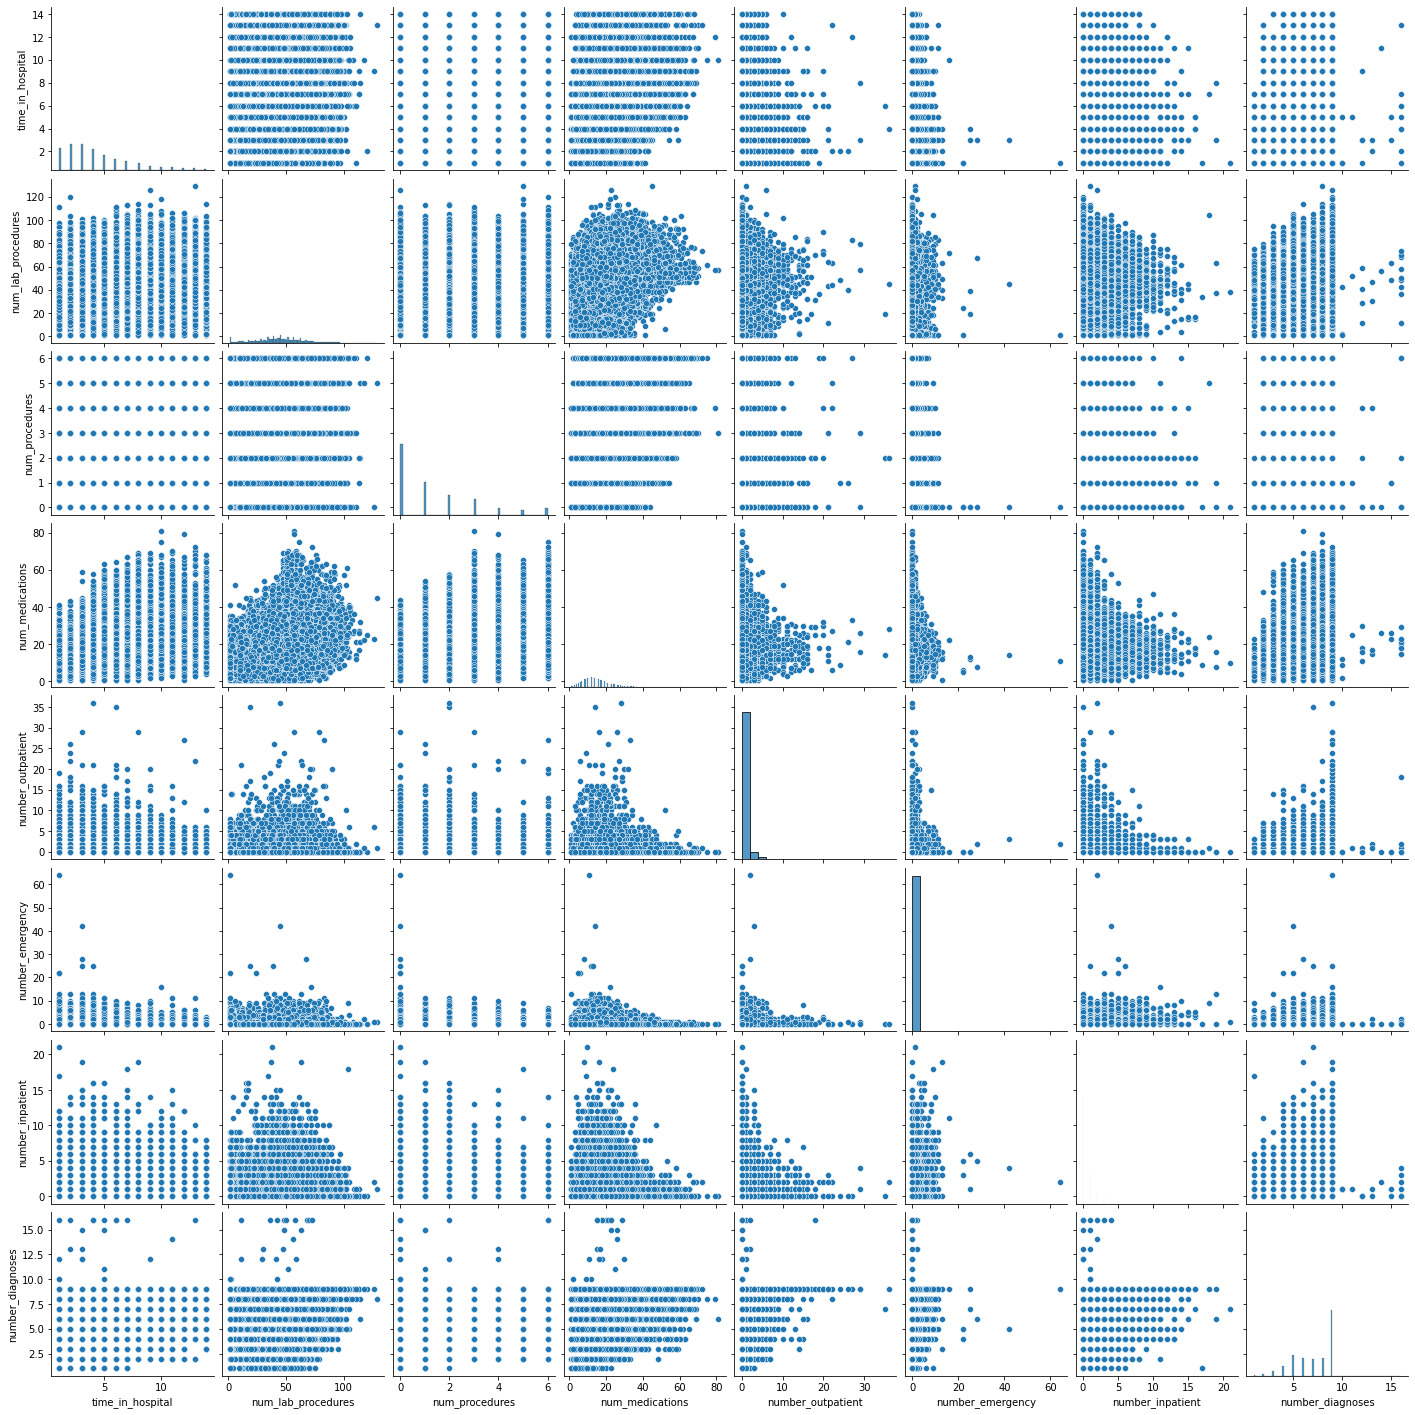

In [32]:
sns.pairplot(diabetes_df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']])

<Axes: >

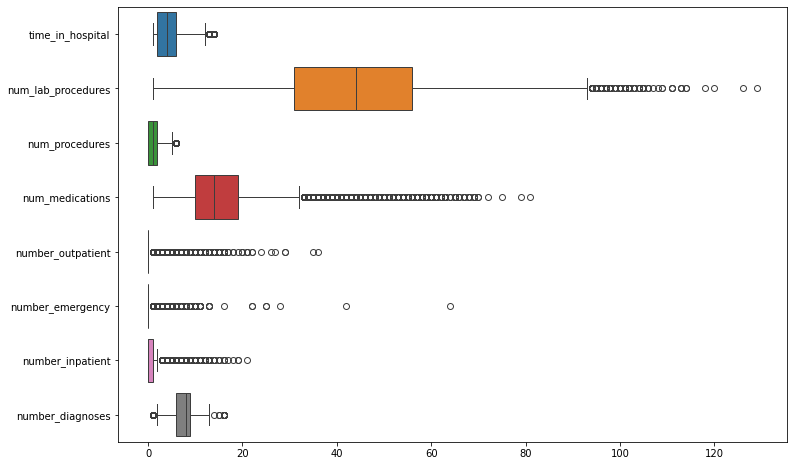

In [33]:
# construct box plot for continuous variables

plt.figure(figsize = (12, 8))
sns.boxplot(data = diabetes_df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']], orient = 'h')

Text(0.5, 1.0, 'Heat map diplaying the correlation between the variables in the dataframe')

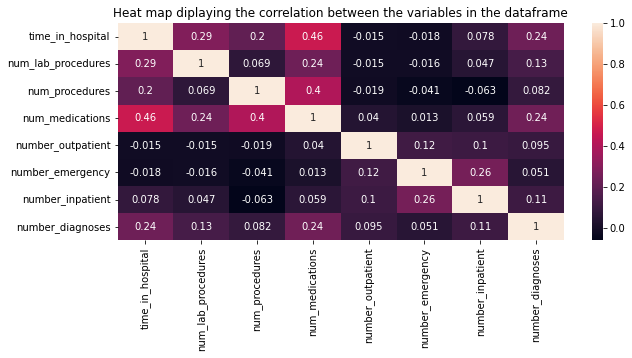

In [34]:
plt.figure(figsize = (10, 4))
sns.heatmap(diabetes_df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']].corr(), annot = True)
plt.title('Heat map diplaying the correlation between the variables in the dataframe')

In [35]:
# Converting the object types to categorical types

for feature in diabetes_df.columns:
  if diabetes_df[feature].dtype == 'object':
    print('feature: ', feature)
    print(pd.Categorical(diabetes_df[feature].unique()))
    print(pd.Categorical(diabetes_df[feature].unique()).codes)
    diabetes_df[feature] = pd.Categorical(diabetes_df[feature]).codes
    print('\n\n')

feature:  race
['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic']
Categories (5, object): ['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other']
[2 0 4 1 3]



feature:  gender
['Female', 'Male', 'Unknown/Invalid']
Categories (3, object): ['Female', 'Male', 'Unknown/Invalid']
[0 1 2]



feature:  age
['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
Categories (10, object): ['[0-10)', '[10-20)', '[20-30)', '[30-40)', ..., '[60-70)', '[70-80)', '[80-90)', '[90-100)']
[0 1 2 3 4 5 6 7 8 9]



feature:  change
['No', 'Ch']
Categories (2, object): ['Ch', 'No']
[1 0]



feature:  diabatic
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]





In [36]:
diabetes_df.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabatic
0,2,0,0,6,25,1,1,41,0,1,0,0,0,1,1,0
1,2,0,1,1,1,7,3,59,0,18,0,0,0,9,0,1
2,0,0,2,1,1,7,2,11,5,13,2,0,1,6,1,1
3,2,1,3,1,1,7,2,44,1,16,0,0,0,7,0,1
4,2,1,4,1,1,7,1,51,0,8,0,0,0,5,0,1
5,2,1,5,2,1,2,3,31,6,16,0,0,0,9,1,1
6,2,1,6,3,1,2,4,70,1,21,0,0,0,7,0,1
7,2,1,7,1,1,7,5,73,0,12,0,0,0,8,1,1
8,2,0,8,2,1,4,13,68,2,28,0,0,0,8,0,1
9,2,0,9,3,3,4,12,33,3,18,0,0,0,8,0,1


In [37]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68697 entries, 0 to 70179
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   race                      68697 non-null  int8 
 1   gender                    68697 non-null  int8 
 2   age                       68697 non-null  int8 
 3   admission_type_id         68697 non-null  int64
 4   discharge_disposition_id  68697 non-null  int64
 5   admission_source_id       68697 non-null  int64
 6   time_in_hospital          68697 non-null  int64
 7   num_lab_procedures        68697 non-null  int64
 8   num_procedures            68697 non-null  int64
 9   num_medications           68697 non-null  int64
 10  number_outpatient         68697 non-null  int64
 11  number_emergency          68697 non-null  int64
 12  number_inpatient          68697 non-null  int64
 13  number_diagnoses          68697 non-null  int64
 14  change                    68697 non-null  i

In [38]:
X = diabetes_df.drop('diabatic', axis = 1)
X

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change
0,2,0,0,6,25,1,1,41,0,1,0,0,0,1,1
1,2,0,1,1,1,7,3,59,0,18,0,0,0,9,0
2,0,0,2,1,1,7,2,11,5,13,2,0,1,6,1
3,2,1,3,1,1,7,2,44,1,16,0,0,0,7,0
4,2,1,4,1,1,7,1,51,0,8,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70174,2,0,8,1,3,7,4,44,0,17,0,0,2,9,1
70175,0,0,8,1,3,7,7,60,0,17,0,1,1,9,1
70176,0,0,7,1,1,7,3,57,4,11,0,0,1,9,1
70177,0,1,9,1,3,7,4,21,1,8,0,0,1,9,1


In [39]:
y = diabetes_df['diabatic']
y

0        0
1        1
2        1
3        1
4        1
        ..
70174    0
70175    0
70176    0
70177    0
70179    0
Name: diabatic, Length: 68697, dtype: int8

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [41]:
print('X_train.shape: ', X_train.shape)
X_train

X_train.shape:  (48087, 15)


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change
2286,2,1,7,1,3,7,8,32,0,17,0,0,0,5,1
38178,0,0,5,1,1,7,2,44,0,23,0,0,1,9,1
7783,2,0,8,2,3,7,3,44,0,12,0,0,0,5,0
30031,2,1,6,5,6,17,7,18,1,19,0,0,0,9,0
65418,2,1,4,1,1,7,2,42,0,13,0,0,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50367,2,0,5,1,1,7,3,65,0,23,1,0,2,9,1
20945,2,1,7,1,1,7,7,60,1,27,0,0,4,9,1
21791,2,1,6,3,1,1,3,50,3,20,0,0,2,9,0
51330,2,1,6,3,1,7,2,9,0,5,0,0,0,5,1


In [42]:
print('y_train.shape: ', y_train.shape)
y_train

y_train.shape:  (48087,)


2286     1
38178    1
7783     1
30031    1
65418    0
        ..
50367    0
20945    1
21791    1
51330    1
5302     0
Name: diabatic, Length: 48087, dtype: int8

In [43]:
print('X_test.shape: ', X_test.shape)
X_test

X_test.shape:  (20610, 15)


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change
52201,2,0,6,2,1,7,3,51,1,13,0,0,0,9,0
3946,0,0,6,2,1,2,8,4,0,8,0,0,0,5,1
20556,2,0,5,1,1,7,3,55,0,17,0,0,0,8,0
68393,2,0,8,1,1,7,9,68,3,18,0,0,1,7,1
53659,2,0,8,1,3,7,3,59,1,20,1,0,1,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30633,0,0,8,1,6,7,3,38,1,25,0,0,0,9,0
46950,2,0,7,5,1,1,2,2,2,15,0,0,0,4,1
53596,2,1,8,1,1,7,3,51,0,13,0,0,0,6,1
67303,2,1,5,1,1,7,4,41,0,18,5,0,2,9,1


In [44]:
print('y_test.shape: ', y_test.shape)
y_test

y_test.shape:  (20610,)


52201    1
3946     1
20556    1
68393    0
53659    0
        ..
30633    1
46950    0
53596    1
67303    0
28968    1
Name: diabatic, Length: 20610, dtype: int8

In [45]:
dtcl = DecisionTreeClassifier(random_state=1)
dtcl.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [46]:
# dtcl model's prediction on training data

y_train_predict = dtcl.predict(X_train)
y_train_predict

array([1, 1, 1, ..., 1, 1, 0], dtype=int8)

In [47]:
# dtcl model's prediction on taining data

conf_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = [['0', '1']], index = [['0', '1']])
conf_train

,0,1
0,16017,0
1,6,32064


In [48]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16017
           1       1.00      1.00      1.00     32070

    accuracy                           1.00     48087
   macro avg       1.00      1.00      1.00     48087
weighted avg       1.00      1.00      1.00     48087



In [49]:
# dtcl model's prediction probability on training data

y_train_predict_prob = dtcl.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
auc_score_train = roc_auc_score(y_train, y_train_predict_prob_pos)
print('auc_score of dtcl model on training data: ', auc_score_train)

auc_score of dtcl model on training data:  0.9999999649577188


Text(0.5, 1.0, 'ROC curve of dtcl model on training data.')

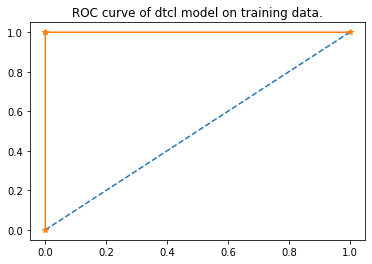

In [50]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.title('ROC curve of dtcl model on training data.')

In [51]:
# dtcl model's prediction on test data

y_test_predict = dtcl.predict(X_test)
y_test_predict

array([1, 1, 1, ..., 0, 0, 1], dtype=int8)

In [52]:
# dtcl model's prediction on test data

conf_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = [['0', '1']], index = [['0', '1']])
conf_test

,0,1
0,3941,3033
1,2956,10680


In [53]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57      6974
           1       0.78      0.78      0.78     13636

    accuracy                           0.71     20610
   macro avg       0.68      0.67      0.67     20610
weighted avg       0.71      0.71      0.71     20610



In [54]:
# dtcl model's prediction probability on test data

y_test_predict_prob = dtcl.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
auc_score_test = roc_auc_score(y_test, y_test_predict_prob_pos)
print('auc_score of dtcl model on test data: ', auc_score_test)

auc_score of dtcl model on test data:  0.6741288285037759


Text(0.5, 1.0, 'ROC curve of dtcl model on test data.')

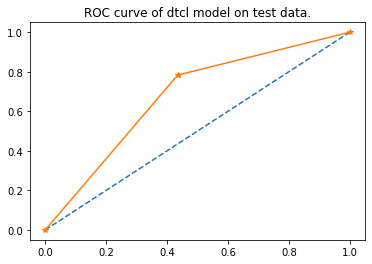

In [55]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.title('ROC curve of dtcl model on test data.')

In [56]:
print(pd.DataFrame(dtcl.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp', ascending = False))

                               Imp
change                    0.301624
num_lab_procedures        0.159400
num_medications           0.108790
time_in_hospital          0.082348
age                       0.066346
discharge_disposition_id  0.047977
num_procedures            0.045880
number_inpatient          0.034831
number_diagnoses          0.032021
admission_source_id       0.024165
gender                    0.023306
admission_type_id         0.022039
race                      0.021106
number_outpatient         0.018971
number_emergency          0.011194


|--- feature_14 <= 0.50
|   |--- class: 1
|--- feature_14 >  0.50
|   |--- feature_13 <= 5.50
|   |   |--- feature_9 <= 4.50
|   |   |   |--- feature_2 <= 2.50
|   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |--- feature_9 <= 1.50
|   |   |   |   |   |   |--- feature_4 <= 13.00
|   |   |   |   |   |   |   |--- feature_12 <= 2.00
|   |   |   |   |   |   |   |   |--- feature_7 <= 61.00
|   |   |   |   |   |   |   |   |   |--- feature_7 <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- feature_5 <= 4.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_5 >  4.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_7 >  1.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_7 >  61.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_12 >  2.00
|   |   |   |   |   |   |   | 

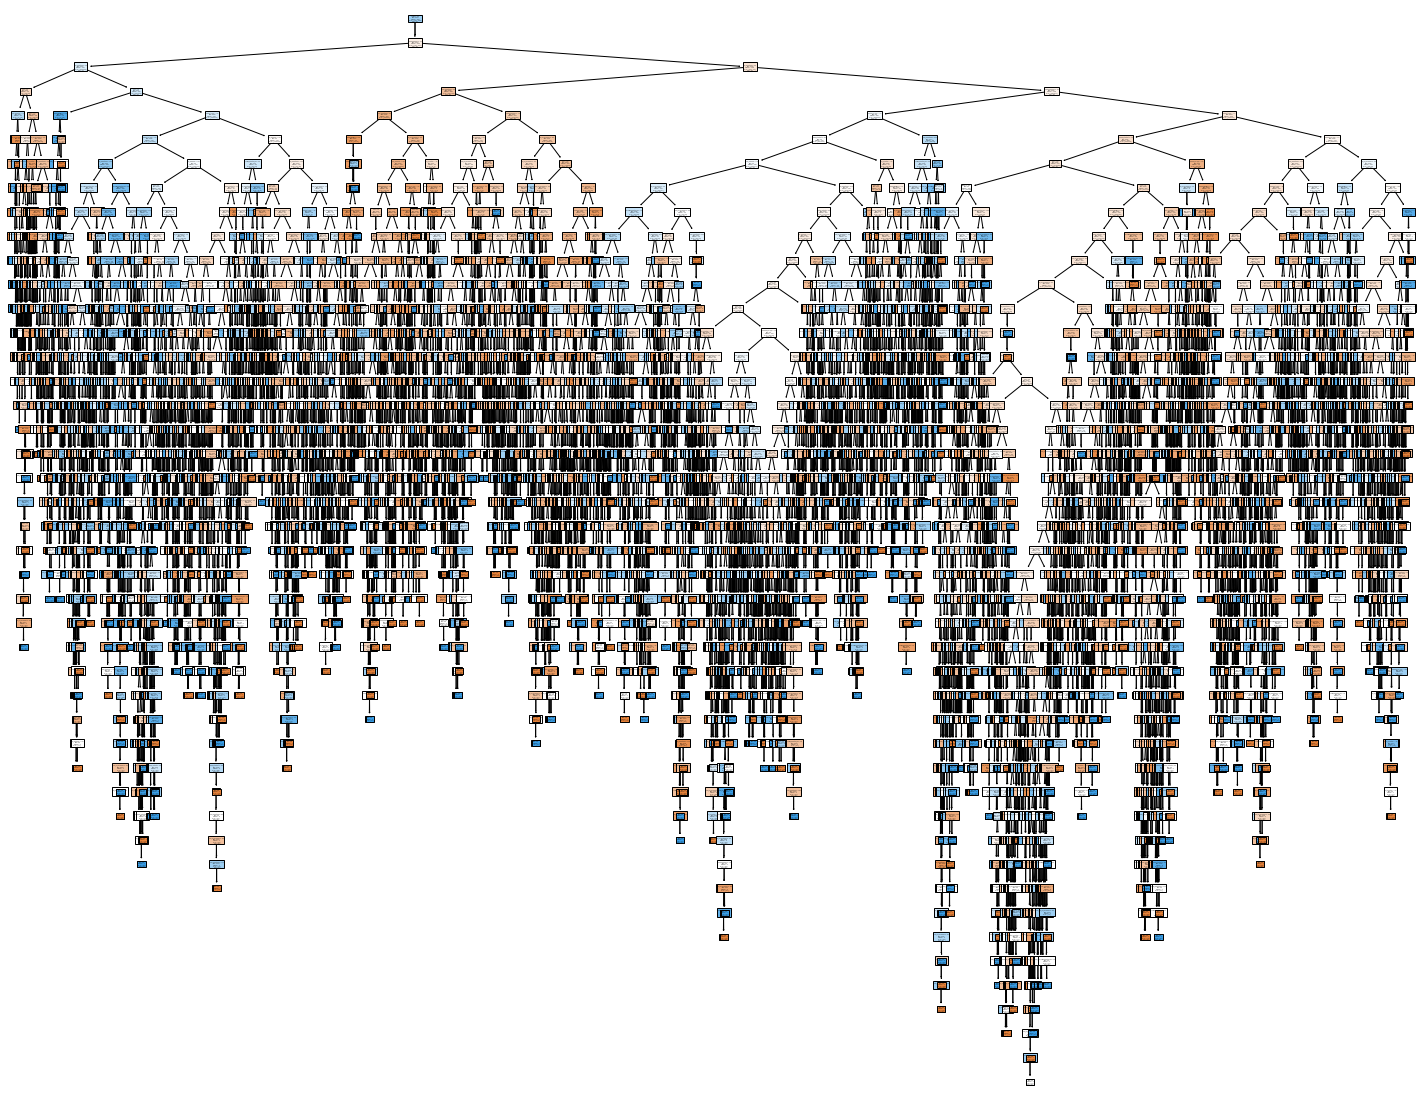

In [57]:
# Decision tree visualization

text_representation = tree.export_text(dtcl)
print(text_representation)

train_char_label = ['No', 'Yes']

# Saving it to the file
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

# The plot_tree returns annotations for the plot, to not show them in the notebook I assigned returned value to _
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtcl, feature_names = list(X_train), class_names = list(train_char_label), filled = True)

# To save the figure to the .png file:
fig.savefig("default_decistion_tree.png")

In [58]:
'''
train_char_label = ['No', 'Yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(dtcl, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))
tree_regularized.close()
dot_data
'''

"\ntrain_char_label = ['No', 'Yes']\ntree_regularized = open('tree_regularized.dot','w')\ndot_data = tree.export_graphviz(dtcl, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))\ntree_regularized.close()\ndot_data\n"

In [59]:
# Regularized dtcl classifier

param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150],
    'min_samples_split': [150,300,450],
}


grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=450,
                       random_state=1)

In [60]:
'''
train_char_label = ['No', 'Yes']
tree_regularized = open('tree_regularized_1.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data
'''

"\ntrain_char_label = ['No', 'Yes']\ntree_regularized = open('tree_regularized_1.dot','w')\ndot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))\n\ntree_regularized.close()\ndot_data\n"

In [61]:
# Regularized dtcl model's prediction on training data

y_train_predict = best_grid.predict(X_train)
y_train_predict

array([1, 1, 1, ..., 1, 1, 0], dtype=int8)

In [62]:
# Regularized dtcl model's performance on taining data

conf_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = [['0', '1']], index = [['0', '1']])
conf_train

,0,1
0,11284,4733
1,7065,25005


In [63]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.61      0.70      0.66     16017
           1       0.84      0.78      0.81     32070

    accuracy                           0.75     48087
   macro avg       0.73      0.74      0.73     48087
weighted avg       0.77      0.75      0.76     48087



In [64]:
# Regularized dtcl model's prediction probability on training data

y_train_predict_prob = best_grid.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
auc_score_train = roc_auc_score(y_train, y_train_predict_prob_pos)
print('auc_score of regularized dtcl model on training data: ', auc_score_train)

auc_score of regularized dtcl model on training data:  0.8466067916729961


Text(0.5, 1.0, 'ROC curve of regularized dtcl model on training data.')

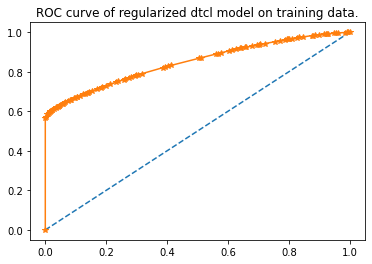

In [65]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.title('ROC curve of regularized dtcl model on training data.')

In [66]:
# Regularized dtcl model's prediction on test data

y_test_predict = best_grid.predict(X_test)
y_test_predict

array([1, 1, 1, ..., 0, 0, 1], dtype=int8)

In [67]:
# Regularized dtcl model's performance on test data

conf_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = [['0', '1']], index = [['0', '1']])
conf_test

,0,1
0,4786,2188
1,3096,10540


In [68]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.61      0.69      0.64      6974
           1       0.83      0.77      0.80     13636

    accuracy                           0.74     20610
   macro avg       0.72      0.73      0.72     20610
weighted avg       0.75      0.74      0.75     20610



In [69]:
# Regularized dtcl model's prediction probability on test data

y_test_predict_prob = best_grid.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
auc_score_test = roc_auc_score(y_test, y_test_predict_prob_pos)
print('auc_score of regularized dtcl model on test data: ', auc_score_test)

auc_score of regularized dtcl model on test data:  0.8351856312382842


Text(0.5, 1.0, 'ROC curve of regularized dtcl model on test data.')

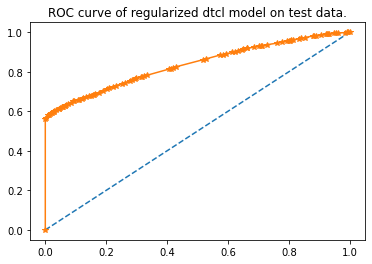

In [70]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.title('ROC curve of regularized dtcl model on test data.')

|--- feature_14 <= 0.50
|   |--- class: 1
|--- feature_14 >  0.50
|   |--- feature_13 <= 5.50
|   |   |--- feature_9 <= 4.50
|   |   |   |--- feature_2 <= 2.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  2.50
|   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  1.50
|   |   |   |   |   |--- feature_7 <= 24.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_7 >  24.00
|   |   |   |   |   |   |--- class: 0
|   |   |--- feature_9 >  4.50
|   |   |   |--- feature_2 <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  1.50
|   |   |   |   |--- feature_3 <= 2.50
|   |   |   |   |   |--- feature_5 <= 6.50
|   |   |   |   |   |   |--- feature_9 <= 10.50
|   |   |   |   |   |   |   |--- feature_4 <= 5.50
|   |   |   |   |   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   | 

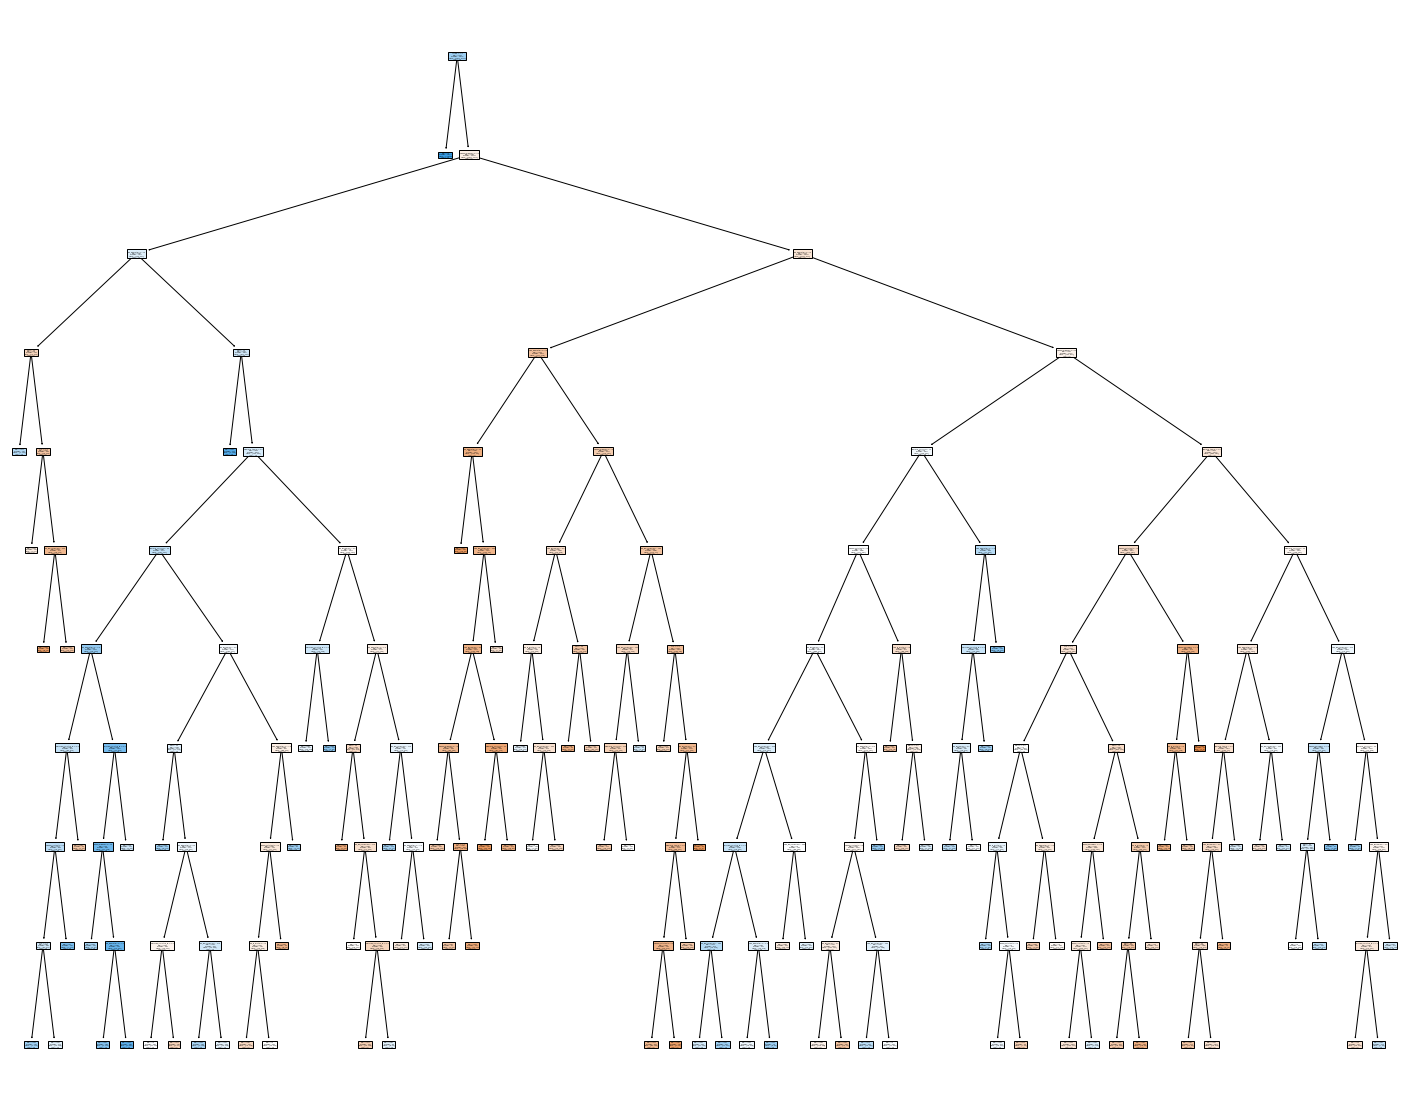

In [71]:
# Regularized Decision tree visualization

text_representation = tree.export_text(best_grid)
print(text_representation)

train_char_label = ['No', 'Yes']

# Saving it to the file
with open("regularized_decistion_tree.log", "w") as fout:
    fout.write(text_representation)

# The plot_tree returns annotations for the plot, to not show them in the notebook I assigned returned value to _
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_grid, feature_names = list(X_train), class_names = list(train_char_label), filled = True)

# To save the figure to the .png file:
fig.savefig("regularized_decistion_tree.png")

The dataset on which the model was prepared contained data points out of which 69% are diabetic and 33% are non diabetic.

The default decision tree model (dtcl) is overfitting -
1.   100% train accuracy is a strong sign of overfitting.
2.   The model fails to generalize well, as test accuracy drops to 67% leading to a poor non-diabetic prediction (56.5%) in the test set.

The regularized decision tree model (best_grid) generalizes better -

1.   Lower train accuracy (75%) suggests it’s not memorizing the training data.
2.   Higher test accuracy (74%) means it performs better on unseen data.
3.   It improves non-diabetic classification accuracy significantly (68.6% using regularized decision tree model vs. 56.5% using the default decision tree model).

Hence the regularized decision tree model (best_grid) should be used for predicting unknown data points.